# Homework #1
Joseph Prisaznuk

10/11/2024

## Import packages and load the data

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv') # load .csv file
n = len(data)                           # number of data points
x = data['GrLivArea'].to_numpy()        # make numpy array
y = data['SalePrice'].to_numpy()        # make numpy array

mLR,bLR = np.polyfit(x, y, 1)           # linear regression result for comparison
print('y = %f * x + %f' % (mLR,bLR))

11425.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
y = 87.688145 * x + 34754.077892


### Model and loss functions

In [332]:
def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

### Partial derivates to update m and b

In [333]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

# Learning Curve as a Function of Batch Size

In [334]:
learning_rate_m = 1e-7  # learning rate m
learning_rate_b = 1e-2  # learning rate b
lossVal = []            # initialize the loss value

batch_size = np.array([32, 64, 128, 256, 512, 551])
loop_N = 20*n//batch_size

loss_history = np.zeros((max(loop_N), len(batch_size))) # plot progress over time
loss_x = np.zeros((max(loop_N), len(batch_size)))       # plot progress over time

m = 5*np.ones(len(batch_size))      # initial slope 
b = 1000*np.ones(len(batch_size))   # initial intercept

for j in range(0,len(batch_size)):

    loss_x[:loop_N[j],j] = np.arange(0,loop_N[j])

    for i in range(loop_N[j]):
        data_batch = data.sample(batch_size[j])     # sample the pandas dataframe
        data_x = data_batch['GrLivArea'].to_numpy() # convert panda data to numpy array
        data_y = data_batch['SalePrice'].to_numpy() # convert panda data to numpy array
        
        m[j] = updated_m(data_x,data_y,m[j],b[j],learning_rate_m) # update slope based on the current values
        b[j] = updated_b(data_x,data_y,m[j],b[j],learning_rate_b) # update intercept based on the current values

        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m[j],b[j]))

        # keep a history of our loss values
        loss_history[i,j] = loss_value

Text(0.5, 1.0, 'Loss Function Varying Batch Size')

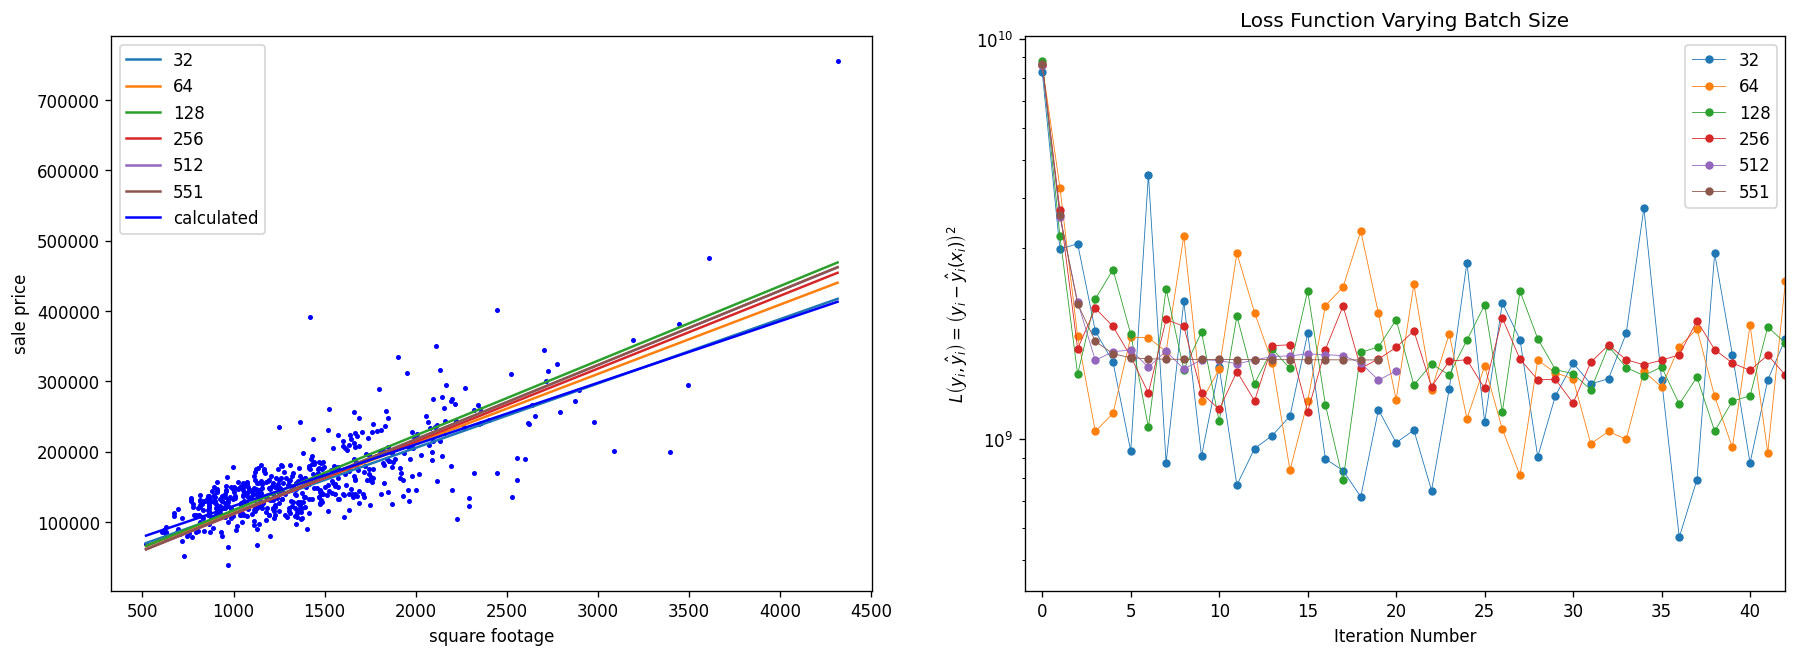

In [335]:
loss_history[loss_history == 0] = 'nan' # allows for plotting multiple curves with different # points

fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=120)

ax[0].plot(x,y,'bo',markersize=2)
line_x = np.arange(x.min(),x.max())
for i in range(len(batch_size)):
    line_y_SGD = line_x * m[i] + b[i]
    ax[0].plot(line_x,line_y_SGD,'-',label=batch_size[i])

line_y = line_x * mLR + bLR
ax[0].plot(line_x,line_y,'b-',label='calculated')
ax[0].legend()
ax[0].set_xlabel('square footage')
ax[0].set_ylabel('sale price')

ax[1].plot(loss_x,loss_history,lw=0.5,ls='-',marker='o',markersize=4)
ax[1].set_yscale('log')
ax[1].set_xlim(-1,max(loss_x[:,3])) # don't plot all of the iterations so we can see the beginning more clearly
ax[1].legend(batch_size)
ax[1].set_ylabel("$L\\left(y_i, \\hat{y}_i\\right)=\\left(y_i-\\hat{y}_i\\left(x_i\\right)\\right)^2$")
ax[1].set_xlabel("Iteration Number")
ax[1].set_title("Loss Function Varying Batch Size")

# Discussion

Clearly, decreasing the batch size reduces the ability of the loss function to converge on a minimum. However, it can be seen from the comparison to the calculated line of best fit that all of the different batch sizes produce a reasonable model of the data.

# Bonus

In [336]:
mult = np.array([1, 2, 4, 8]) # multiplication factor

learning_rate_m = 1e-7*mult  # learning rate m
learning_rate_b = 1e-1*mult  # learning rate b
batch_size = 64*mult         # batch size
loop_N = 20*n//batch_size    # number of iterations

loss_history = np.zeros((max(loop_N), len(batch_size))) # plot progress over time
loss_x = np.zeros((max(loop_N), len(batch_size)))       # plot progress over time

m = 5*np.ones(len(batch_size))      # initial slope 
b = 1000*np.ones(len(batch_size))   # initial intercept

for j in range(0,len(batch_size)):

    loss_x[:loop_N[j],j] = np.arange(0,loop_N[j])

    for i in range(loop_N[j]):
        data_batch = data.sample(batch_size[j])     # sample the pandas dataframe
        data_x = data_batch['GrLivArea'].to_numpy() # convert panda data to numpy array
        data_y = data_batch['SalePrice'].to_numpy() # convert panda data to numpy array
        
        m[j] = updated_m(data_x,data_y,m[j],b[j],learning_rate_m[j]) # update slope based on the current values
        b[j] = updated_b(data_x,data_y,m[j],b[j],learning_rate_b[j]) # update intercept based on the current values

        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m[j],b[j]))

        # keep a history of our loss values
        loss_history[i,j] = loss_value

Text(0.5, 1.0, 'X*(batch size = 64, LR_m = 1e-7, LR_b = 1e-1)')

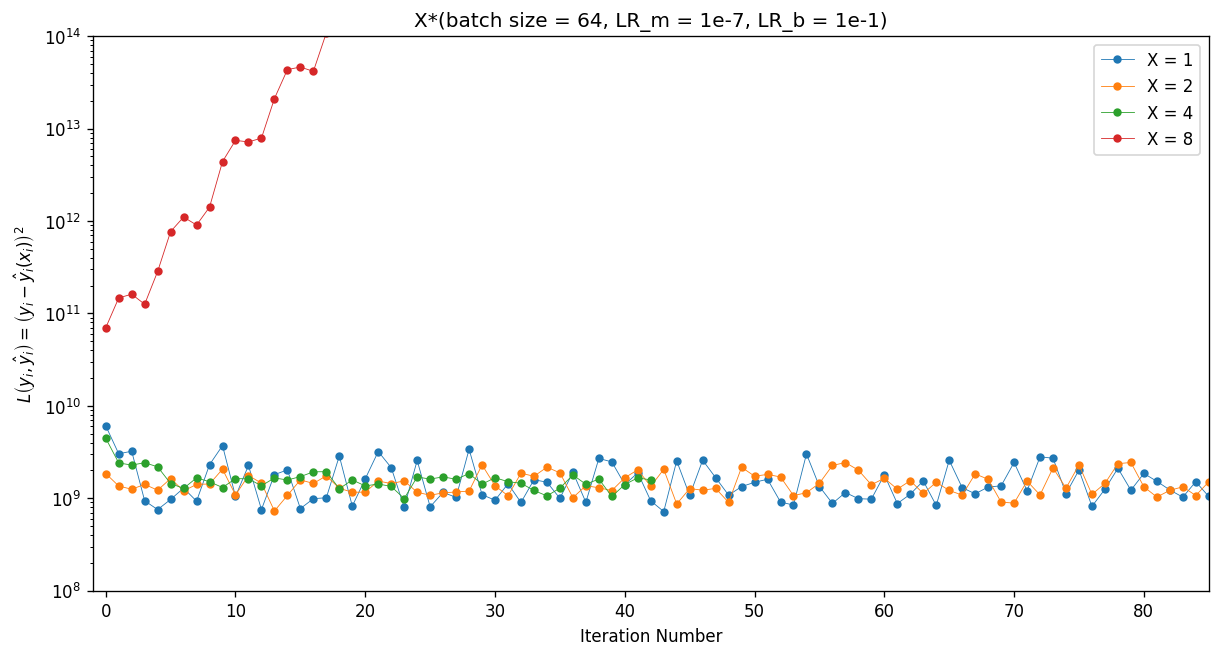

In [337]:
loss_history[loss_history == 0] = 'nan' # allows for plotting multiple curves with different # points
plt.figure(figsize=(12,6),dpi=120)
plt.plot(loss_x,loss_history,lw=0.5,ls='-',marker='o',markersize=4)
plt.yscale('log')
plt.xlim(-1,max(loss_x[:,1])) # don't plot all of the iterations so we can see the beginning more clearly
plt.ylim(1e8,1e14) # don't plot all of the iterations so we can see the beginning more clearly
plt.legend([f'X = {value}' for value in mult])
plt.ylabel("$L\\left(y_i, \\hat{y}_i\\right)=\\left(y_i-\\hat{y}_i\\left(x_i\\right)\\right)^2$")
plt.xlabel("Iteration Number")
plt.title("X*(batch size = 64, LR_m = 1e-7, LR_b = 1e-1)")

## Bonus discussion

The training process diverges when the batch size/learning rate multiplier is set to 8.